In [129]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os as os
# Algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb

In [130]:
#load the raw data

df = pd.read_excel("Laptops_data.xlsx")
gpu_missing = pd.read_excel("missing_gpu_found.xlsx")
weights_missing = pd.read_excel("missing_weights_found.xlsx")

In [131]:
#join the missing values

df.set_index('Name', inplace=True)
gpu_missing.set_index('Name', inplace=True)
weights_missing.set_index('Name', inplace=True)

new_df = df.combine_first(gpu_missing)
new_df = new_df.combine_first(weights_missing)

In [132]:
#check if the columns have missing values

new_df.isnull().sum()

Backlit Keyboard           0
Clock Speed              136
EMMC Storage Capacity      0
Fingerprint Sensor         0
Graphic Processor          0
HDD Capacity               0
Operating System           0
Price                      0
Processor Brand            0
Processor Generation     415
Processor Name             0
RAM                        0
SSD                        0
SSD Capacity               0
Screen Resolution          0
Screen Size                0
Screen Type               66
Touchscreen                0
Type                       0
Unnamed: 0               910
Weight                     0
dtype: int64

In [133]:
#check the dataframe structure

new_df.head(5)

,Backlit Keyboard,Clock Speed,EMMC Storage Capacity,Fingerprint Sensor,Graphic Processor,HDD Capacity,Operating System,Price,Processor Brand,Processor Generation,...,RAM,SSD,SSD Capacity,Screen Resolution,Screen Size,Screen Type,Touchscreen,Type,Unnamed: 0,Weight
Name,,,,,,,,,,,,,,,,,,,,,
"ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 2060/300 Hz) M15R3 / AWM15R3 Gaming Laptop (15.6 inch, Lunar Light, 2.5 kg, With MS Office)",Yes,2.6 GHz with Turbo Boost Upto 5 GHz,0,No,NVIDIA GeForce RTX 2060,0,Windows 10 Home,"₹2,02,490",Intel,10th Gen,...,16 GB,Yes,1 TB,1920 x 1080 Pixel,39.62 cm (15.6 inch),Full HD LED Backlit Anti-glare IPS Display (30...,No,Gaming Laptop,NaN,2.5 kg
"APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A (13.3 inch, Space Grey, 1.29 kg)",No,NaN,0,No,Apple 8-core GPU,0,Mac OS Big Sur,"₹79,990",Apple,NaN,...,8 GB,Yes,256 GB,2560 x 1600 Pixel,33.78 cm (13.3 inch),"Quad LED Backlit IPS Display (227 PPI, 400 nit...",No,Thin and Light Laptop,19.0,1.29 kg
"APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SSD/Mac OS Monterey) MK1A3HN/A (16.2 inch, Space Grey�, 2.2 kg)",Yes,NaN,0,No,Apple 32-core GPU,0,Mac OS Monterey,"₹3,09,490",Apple,NaN,...,32 GB,Yes,1 TB,3456 x 2234 Pixel,41.15 cm (16.2 inch),"Liquid Retina XDR display, Native resolution a...",No,Laptop,472.0,2.2 kg
"APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SSD/Mac OS Monterey) MK1H3HN/A (16.2 inch, Silver, 2,2 kg)",Yes,NaN,0,No,Apple 32-core GPU,0,Mac OS Monterey,"₹3,03,990",Apple,NaN,...,32 GB,Yes,1 TB,3456 x 2234 Pixel,41.15 cm (16.2 inch),"Liquid Retina XDR display, Native resolution a...",No,Laptop,805.0,"2,2 kg"
"APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SSD/Mac OS Monterey) MK1F3HN/A (16.2 inch, Silver, 2.1 kg)",No,NaN,0,No,Apple 19-core GPU,0,Mac OS Monterey,"₹2,43,990",Apple,NaN,...,16 GB,Yes,1 TB,3456 x 2234 Pixel,41.15 cm (16.2 inch),"Liquid Retina XDR display, Native resolution a...",No,Laptop,549.0,2.1 kg


In [134]:
#check one line example

new_df.iloc[1]

Backlit Keyboard                                                        No
Clock Speed                                                            NaN
EMMC Storage Capacity                                                    0
Fingerprint Sensor                                                      No
Graphic Processor                                         Apple 8-core GPU
HDD Capacity                                                             0
Operating System                                            Mac OS Big Sur
Price                                                              ₹79,990
Processor Brand                                                      Apple
Processor Generation                                                   NaN
Processor Name                                                          M1
RAM                                                                   8 GB
SSD                                                                    Yes
SSD Capacity             

In [135]:
#check the unique values for each column

new_df['Screen Resolution'].unique()

array(['1920 x 1080 Pixel', '2560 x 1600 Pixel', '3456 x 2234 Pixel',
       '3024 x 1964 Pixel', '2560 x 1664 Pixel', '2880 x 1864 Pixel',
       '2560 x 1600 Pixels', '1366 x 768 Pixels', '1366 x 768 Pixel',
       '1920 x 1080 Pixels', '1080*1920 pixel',
       '1920 x 1080$$Pixels pixel', '1920 x 1080 pixel',
       '3840 x 2400$$Pixels pixel', '1920 x 1200 Pixels',
       '3840 x 2400 Pixel', '1920 x 1200 Pixel', '2560 x 1440 Pixel',
       '2560 x 1440 PIxel', '2560 x 1600 PIxel',
       '2880 x 1800$$Pixels pixel', '2880 x 1800 pixel',
       '1080x1920$$Pixels pixel', '1080-1920 pixel', '2880 x 1800 Pixel',
       '1920x1080$$Pixels pixel', '1920 x 1200 pixel', '1920*1080 pixel',
       '2880 x 1620 Pixel', '2880 x 1800 Pixels', '3840 x 2160 Pixel',
       '2880 x 1800 PIxel', '2560 x 1440 Pixels',
       '1920 X 1080$$Pixels pixel', '1920 X 1080 pixel',
       '1920x 1080 pixel', '1920x1080 Pixel', '1,920 x 1,080 pixel',
       '1920x1080 pixel', '?1366 x 768 pixel', '1366 x 7

In [136]:
#clean the dataframe

#clean the target variable
new_df['Price'] = new_df['Price'].str[1:]
new_df['Price'] = new_df['Price'].str.replace(',','')

#clean the features
new_df['Backlit Keyboard'] = new_df['Backlit Keyboard'].map({'Yes': 1, 'No': 0})
new_df['Fingerprint Sensor'] = new_df['Fingerprint Sensor'].map({'Yes': 1, 'No': 0})
new_df['SSD'] = new_df['SSD'].map({'Yes': 1, 'No': 0})
new_df['Touchscreen'] = new_df['Touchscreen'].map({'Yes': 1, 'No': 0})

new_df['RAM'] = new_df['RAM'].str[:-3]

new_df['EMMC Storage Capacity'] = new_df['EMMC Storage Capacity'].map({
    0: 0,
    '64 GB': 64,
    '128 GB': 128
})
new_df['SSD Capacity'] = new_df['SSD Capacity'].map({
    0: 0,
    '8 GB': 8,
    '128 GB': 128,
    '256 GB': 256,
    '512 GB': 512,
    '1 TB': 1024,
    '2 TB': 2048 
})
new_df['HDD Capacity'] = new_df['HDD Capacity'].map({
    0: 0,
    '1 TB': 1024
})

new_df['Operating System'] = new_df['Operating System'].map({
    'Windows 10 Home': 'Windows',
    'Mac OS Big Sur': 'MacOS',
    'Mac OS Monterey': 'MacOS',
    'macOS Ventura': 'MacOS',
    'Mac OS Mojave': 'MacOS',
    'Windows 11 Home': 'Windows',
    'Chrome': 'Other',
    'Windows 10 Pro': 'Windows',
    'Windows 11 Pro': 'Windows',
    'Windows 10' : 'Windows',
    'DOS': 'Other',
    'Prime OS': 'Other'
})

new_df['Graphic Processor Brand'] = new_df['Graphic Processor'].str.split(' ',n = 1, expand=True)[0]

new_df['Screen Size'] = new_df['Screen Size'].str.split(' ',n = 1, expand=True)[0]

new_df['Weight'] = new_df['Weight'].str.split(' ',n = 1, expand=True)[0]
new_df['Weight'] = new_df['Weight'].str.split('$',n = 1, expand=True)[0]
new_df['Weight'] = new_df['Weight'].replace('2,2','2.2')

new_df['Screen Resolution'] = new_df['Screen Resolution'].replace('HD pixel', '1280 x 720 Pixel')
new_df['Screen Resolution'] = new_df['Screen Resolution'].replace('?1366 x 768 pixel', '1366 x 768 Pixel')
new_df['Screen Resolution'] = new_df['Screen Resolution'].replace('1,920 x 1,080 pixel', '1920 x 1080 Pixel')
new_df['Screen Resolution Width'] = new_df['Screen Resolution'].str.extract(r'(\d{4,4})')[0]

aux = new_df['Screen Resolution'].str[4:]
new_df['Screen Resolution Height'] = aux.str.extract(r'(\d{3,4})')[0]

#drop unnecessary columns
columns_to_drop = ['Graphic Processor','Screen Resolution','Processor Generation','Unnamed: 0','Screen Type','Clock Speed','Processor Name']
new_df = new_df.drop(columns=columns_to_drop)


In [137]:
#convert data types

new_df['Price'] = new_df['Price'].astype(int)
new_df['RAM'] = new_df['RAM'].astype(int)
new_df['Screen Size'] = new_df['Screen Size'].astype(float)
new_df['Weight'] = new_df['Weight'].astype(float)
new_df['Screen Resolution Width'] = new_df['Screen Resolution Width'].astype(int)
new_df['Screen Resolution Height'] = new_df['Screen Resolution Height'].astype(int)

In [138]:
#check the dataframe

new_df.head(5)

,Backlit Keyboard,EMMC Storage Capacity,Fingerprint Sensor,HDD Capacity,Operating System,Price,Processor Brand,RAM,SSD,SSD Capacity,Screen Size,Touchscreen,Type,Weight,Graphic Processor Brand,Screen Resolution Width,Screen Resolution Height
Name,,,,,,,,,,,,,,,,,
"ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/Windows 10 Home/6 GB Graphics/NVIDIA GeForce RTX 2060/300 Hz) M15R3 / AWM15R3 Gaming Laptop (15.6 inch, Lunar Light, 2.5 kg, With MS Office)",1,0,0,0,Windows,202490,Intel,16,1,1024,39.62,0,Gaming Laptop,2.50,NVIDIA,1920,1080
"APPLE 2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A (13.3 inch, Space Grey, 1.29 kg)",0,0,0,0,MacOS,79990,Apple,8,1,256,33.78,0,Thin and Light Laptop,1.29,Apple,2560,1600
"APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SSD/Mac OS Monterey) MK1A3HN/A (16.2 inch, Space Grey�, 2.2 kg)",1,0,0,0,MacOS,309490,Apple,32,1,1024,41.15,0,Laptop,2.20,Apple,3456,2234
"APPLE 2021 Macbook Pro M1 Max - (32 GB/1 TB SSD/Mac OS Monterey) MK1H3HN/A (16.2 inch, Silver, 2,2 kg)",1,0,0,0,MacOS,303990,Apple,32,1,1024,41.15,0,Laptop,2.20,Apple,3456,2234
"APPLE 2021 Macbook Pro M1 Pro - (16 GB/1 TB SSD/Mac OS Monterey) MK1F3HN/A (16.2 inch, Silver, 2.1 kg)",0,0,0,0,MacOS,243990,Apple,16,1,1024,41.15,0,Laptop,2.10,Apple,3456,2234


In [139]:
#Convert categorical features to dummies

new_df = pd.get_dummies(new_df)

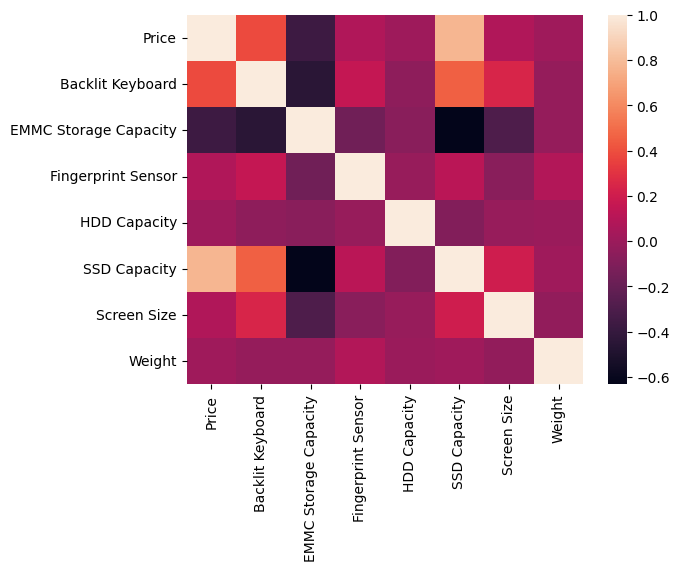

In [159]:
#Show the correlation matrix

corr_matrix = new_df[[
    'Price',
    'Backlit Keyboard',
    'EMMC Storage Capacity',
    'Fingerprint Sensor',
    'HDD Capacity',
    'SSD Capacity',
    'Screen Size',
    'Weight'
]].corr()

sn.heatmap(corr_matrix)
plt.show()

In [183]:
#Check correlation with the target

corr_matrix = new_df.corr()

print(corr_matrix["Price"].sort_values(ascending=False))

Price                               1.000000
RAM                                 0.786224
SSD Capacity                        0.775488
Screen Resolution Width             0.660255
Screen Resolution Height            0.659252
Graphic Processor Brand_NVIDIA      0.459941
Type_Gaming Laptop                  0.440003
SSD                                 0.395345
Backlit Keyboard                    0.385332
Operating System_MacOS              0.334137
Processor Brand_Apple               0.329125
Graphic Processor Brand_Apple       0.329125
Operating System_Windows            0.241519
Processor Brand_AMD                 0.153434
Type_2 in 1 Gaming Laptop           0.102256
Screen Size                         0.079989
Fingerprint Sensor                  0.079167
Graphic Processor Brand_Arc         0.069066
Type_2 in 1 Laptop                  0.054072
Touchscreen                         0.034133
Weight                              0.015710
HDD Capacity                        0.009567
Type_Creat

In [185]:
#Drop features with low correlation < 0.3 AND > -0.3
columns_to_drop = [
    "Operating System_Windows",
    "Processor Brand_AMD",
    "Type_2 in 1 Gaming Laptop",
    "Screen Size",
    "Fingerprint Sensor",
    "Graphic Processor Brand_Arc",
    "Type_2 in 1 Laptop",
    "Touchscreen",
    "Weight",
    "HDD Capacity",
    "Type_Creator Laptop",
    "Type_Handheld Gaming PC",
    "Graphic Processor Brand_RDNA",
    "Type_Business Laptop",
    "Graphic Processor Brand_Qualcomm",
    "Processor Brand_Qualcomm",
    "Type_Notebook",
    "Graphic Processor Brand_AMD",
    "Type_Laptop",
    "Processor Brand_Intel",
    "Graphic Processor Brand_NA",
    "Type_Chromebook",
    "Type_Thin and Light Laptop",
    "Graphic Processor Brand_Intel",
    "Processor Brand_MediaTek",
    "Graphic Processor Brand_MediaTek"
]

new_df = new_df.drop(columns=columns_to_drop)

In [186]:
#Split target and features

X = new_df.drop('Price',axis=1).to_numpy()

y = new_df['Price'].to_numpy()

In [187]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# It's often good practice to scale the features such that they have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
# Dictionary of different algorithms
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Ada Boost Regressor': AdaBoostRegressor(),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(200,),max_iter=1000),
    'XGBoost Regressor': xgb.XGBRegressor()
}

In [189]:
# Initialize an empty list to store the results
results_list = []

metric_func = mean_squared_error
metric_name = 'Mean Squared Error'
# Train and evaluate each model
for model_name, model_instance in regressors.items():
    model_instance.fit(X_train, y_train)
    y_predicted = model_instance.predict(X_test)
    # Compute metrics
    mse = mean_squared_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_predicted)
    mape = mean_absolute_percentage_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # Append results
    results_list.append({
        'Model': model_name, 
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'Mean Absolute Percentage Error': mape,
        'R^2 Score': r2
    })
    # Optionally, print detailed classification report for each model
    # print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")

# Display the performance of all models in a sorted order
results = pd.DataFrame(results_list)
results = results.sort_values(by='R^2 Score', ascending=True)
print(results)

                         Model  Mean Squared Error  Root Mean Squared Error  \
5               MLP Classifier        1.046471e+09             32349.197869   
4          Ada Boost Regressor        8.804161e+08             29671.805643   
6            XGBoost Regressor        7.800891e+08             27930.075016   
0            Linear Regression        7.636094e+08             27633.483275   
1      Decision Tree Regressor        7.134595e+08             26710.662581   
2      Random Forest Regressor        6.866907e+08             26204.783609   
3  Gradient Boosting Regressor        6.864387e+08             26199.974811   

   Mean Absolute Error  Mean Absolute Percentage Error  R^2 Score  
5         13786.601351                        0.178756   0.751937  
4         20950.996531                        0.509327   0.791300  
6         13864.651954                        0.197058   0.815082  
0         16618.884927                        0.292215   0.818988  
1         13442.001058     

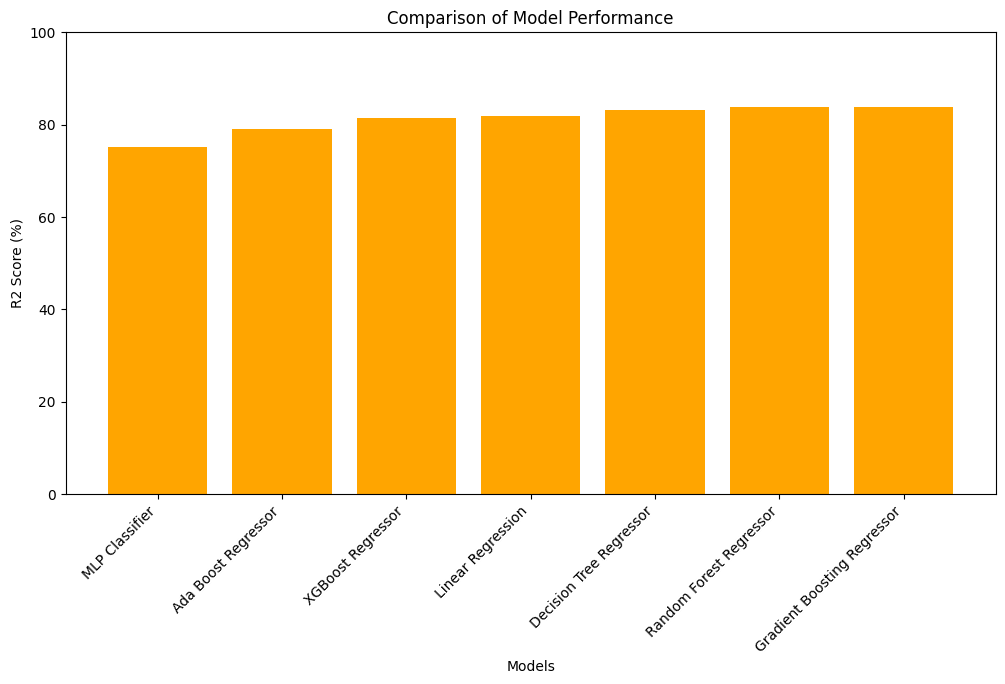

In [190]:
# Visualization of the results
plt.figure(figsize=(12, 6))
splot = plt.bar(results['Model'], 100*results['R^2 Score'], color='orange')
plt.xlabel('Models')
plt.ylabel('R2 Score (%)')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45, ha="right")
plt.ylim([0.0, 100.0])  # Assuming accuracy as the metric, limit is set to 1.0

plt.show()